In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv'
data = pd.read_csv(url, header=None).values

In [ ]:
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [ ]:
data[:,0].shape

(162,)

In [ ]:
X = data[:,0].reshape(-1,1) # make it a 2D array of size N x D where D=1

In [ ]:
X.shape

(162, 1)

In [ ]:
Y = data[:,1]

In [ ]:
Y.shape

(162,)

In [ ]:
type(data)

numpy.ndarray

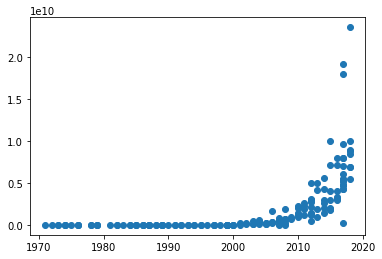

In [ ]:
# Plot the data
plt.scatter(X,Y);
# It is exponential

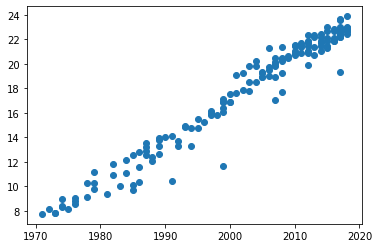

In [ ]:
# We want a linear model, therefore lets take log
Y = np.log(Y)
plt.scatter(X,Y);
# thats better

In [ ]:
X = X-X.mean()

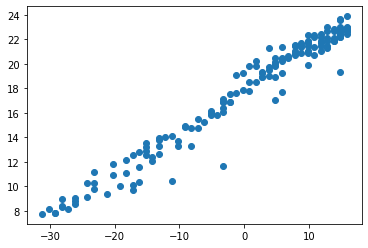

In [ ]:
plt.scatter(X,Y);

In [ ]:
# Since it is a regression problem, there is no activation function required.
# Therefore, in keras, we do use a Dense layer but we pass Activation=None or
# we can simply omit that arguments
# default: activation=None

In [ ]:
# TF Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile
# What optimizer?
# What loss function?
# 'adam' is the best what I have found
# On deep study, I have found over here that in this dataset, SGD optimizer works better.
# API of SGD:
# SGD(learning rate, momentum)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

Observation:

Initial LR performs v well, but later on it bcums too large by the end and therefore the cost becomes too high and the problem never converges.

What to do?
To decrease the LR depending upon the epochs. This is called as 'LR Scheduling'.

In [ ]:
# LR Scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) 

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 314.8874
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 288.6532
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 255.7563
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 253.5621
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 230.5609
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 140.5389
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 127.7482
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 131.1450
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 135.7943
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 131.0349
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 64.7354
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 50.9983
Epoch 13/200
6/6 [=====================

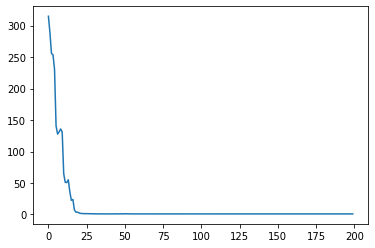

In [ ]:
plt.plot(r.history['loss'], label='loss');

In [ ]:
print(model.layers)
# Note there is only one layer. Input layer doesnt count

In [ ]:
print(model.layers[0].get_weights())

[array([[0.3446452]], dtype=float32), array([17.768213], dtype=float32)]


In [ ]:
# Slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.3446452

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.011190569942688


In [ ]:
# Therefore, we have confirmed that the Moore's law is True as we see it has doubled.

In [ ]:
# Demonstrate the analytical solution for Linear Regression
# This will confirm our above answer too
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a,b)
print("Time to double:", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


SInce TF Dense layer has multiple outputs, it is going to return a 2D Matrix, whereas, we want a matrix of 1D length. therefore, we need to flatten the output so that Y hat has the same shape as Y.

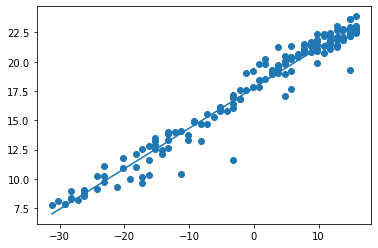

In [ ]:
# Predictions
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat);

In [ ]:
# Observation: Line passes through the data points. That once again confirms the Moore's law.

In [ ]:
# Manual Calculation:
# Weights
w , b = model.layers[0].get_weights()

# Reshape X as we flattened it before
X = X.reshape(-1,1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat , Yhat2)

True